# debugging perturbation of fractions

In [1]:
import logging

import helpers
import numpy as np
import pandas as pd
from helpers import datasets

In [2]:
logger = logging.getLogger(__name__)
logger.setLevel("DEBUG")
helpers.logging.configure_logging()
logging.getLogger().handlers[0].setFormatter(logging.Formatter("%(asctime)s %(levelname)s %(name)s %(message)s"))

In [3]:
fractions_tcga_skcm_mets = datasets.tcga_skcm.load_fractions_mets_only()

Downloading: 100%|██████████| 369/369 [00:01<00:00, 298.46rows/s]


In [4]:
fractions_tcga_skcm_mets

cell_type,B,CAF,Endothelial,Macrophage,Malignant,NK,T,T CD4,T CD8
sample_id,,,,,,,,,
TCGA-3N-A9WB-06A-11R-A38C-07,0.000000,0.018483,0.004211,0.000000,0.971059,0.000000,0.006247,0.000000,0.000000
TCGA-3N-A9WC-06A-11R-A38C-07,0.035060,0.056463,0.004178,0.103408,0.669623,0.000000,0.000000,0.082836,0.048432
TCGA-3N-A9WD-06A-11R-A38C-07,0.044227,0.105762,0.070834,0.036322,0.703525,0.000000,0.000000,0.039330,0.000000
TCGA-BF-AAP0-06A-11R-A39D-07,0.060380,0.189598,0.011349,0.087180,0.524594,0.000000,0.000000,0.092088,0.034811
TCGA-D3-A1Q1-06A-21R-A18T-07,0.000000,0.004057,0.010829,0.006591,0.948013,0.000000,0.030510,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
TCGA-YG-AA3O-06A-11R-A38C-07,0.007658,0.060723,0.000000,0.026970,0.896399,0.000000,0.008250,0.000000,0.000000
TCGA-YG-AA3P-06A-11R-A38C-07,0.000000,0.000000,0.002483,0.008485,0.969895,0.000000,0.019137,0.000000,0.000000
TCGA-Z2-A8RT-06A-11R-A37K-07,0.029734,0.026755,0.002953,0.044928,0.878121,0.000000,0.000000,0.017508,0.000000


In [38]:
def perturb_malignant_fractions(fractions: pd.DataFrame, malignant_fraction_log2_fc: float) -> pd.DataFrame:
    # logger.debug("beginning: %s", fractions)
    fractions = fractions.copy()
    # logger.debug(fractions.sum(axis=1))
    # logger.debug(fractions["Malignant"].mean())
    fractions["Malignant"] *= 2**malignant_fraction_log2_fc
    # logger.debug(fractions["Malignant"].mean())
    # logger.debug("perturbed malignant: %s", fractions)
    # logger.debug(fractions.sum(axis=1))
    fractions = fractions.div(fractions.sum(axis=1), axis=0)
    # logger.debug(fractions["Malignant"].mean())
    # logger.debug("normalized: %s", fractions)
    return fractions

In [39]:
malignant_fraction_log2_fc_values = [0, 0]

In [41]:
# is there something going on with fraction perturbation?
# is it just noise? run multiple times with different seeds

for i, malignant_fraction_log2_fc in enumerate(malignant_fraction_log2_fc_values):
    rng = np.random.default_rng(seed=i + 1)
    experiment_name = f"malignant_fraction_log2_fc={malignant_fraction_log2_fc:.3f}"
    logger.debug("starting experiment %s", experiment_name)
    # logger.debug("perturbing cell type composition")
    # logger.debug("fractions_tcga_skcm_mets: %s", fractions_tcga_skcm_mets)
    fractions_perturbed = perturb_malignant_fractions(fractions_tcga_skcm_mets, malignant_fraction_log2_fc)
    logger.debug(fractions_perturbed["Malignant"].mean())

2022-12-15 04:25:55,312 DEBUG __main__ starting experiment malignant_fraction_log2_fc=0.000
2022-12-15 04:25:55,315 DEBUG __main__ 0.7393564801003312
2022-12-15 04:25:55,315 DEBUG __main__ starting experiment malignant_fraction_log2_fc=0.000
2022-12-15 04:25:55,316 DEBUG __main__ 0.7393564801003312


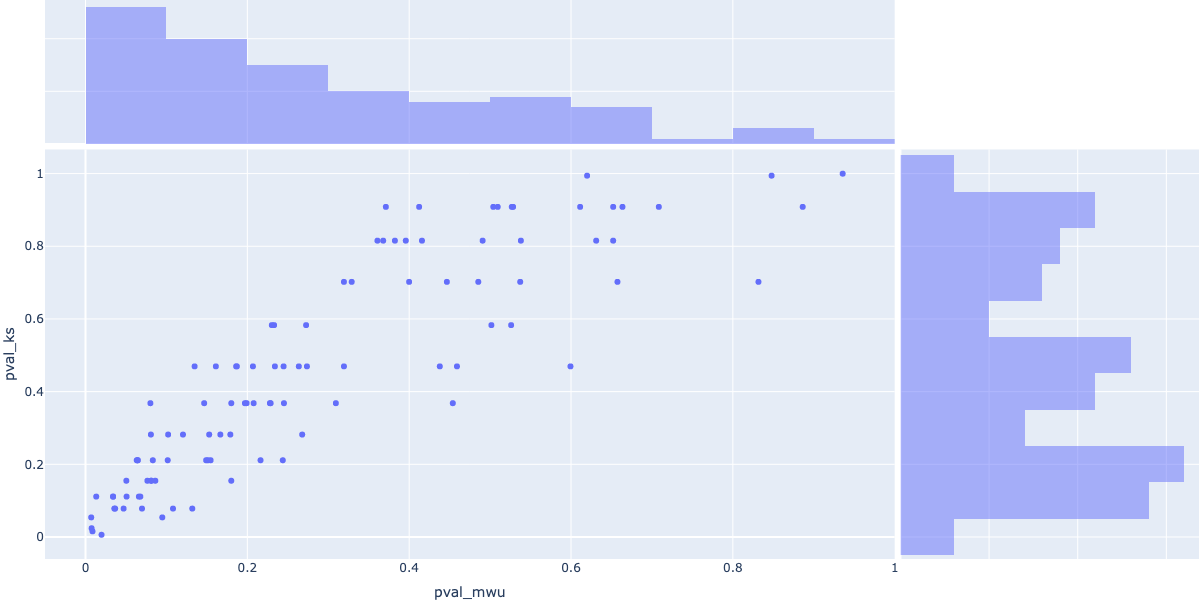

In [52]:
from scipy.stats import ks_2samp, mannwhitneyu

n = 100

rng = np.random.default_rng(seed=0)

control = fractions_tcga_skcm_mets.sample(n, replace=True, random_state=rng)


def make_pvalues():
    for i in range(100):
        rng = np.random.default_rng(seed=i + 1)
        sampled_fractions = fractions_tcga_skcm_mets.sample(n, replace=True, random_state=rng)
        sample1, sample2 = control["Malignant"], sampled_fractions["Malignant"]
        pval_mwu = mannwhitneyu(x=sample1, y=sample2)[1]
        pval_ks = ks_2samp(sample1, sample2)[1]
        yield i, pval_mwu, pval_ks


df = pd.DataFrame(make_pvalues(), columns=["experiment", "pval_mwu", "pval_ks"])

fig = px.scatter(df, x="pval_mwu", y="pval_ks", marginal_x="histogram", marginal_y="histogram")

fig.update_layout(width=600, height=600, margin=dict(l=0, r=0, t=0, b=0))
fig

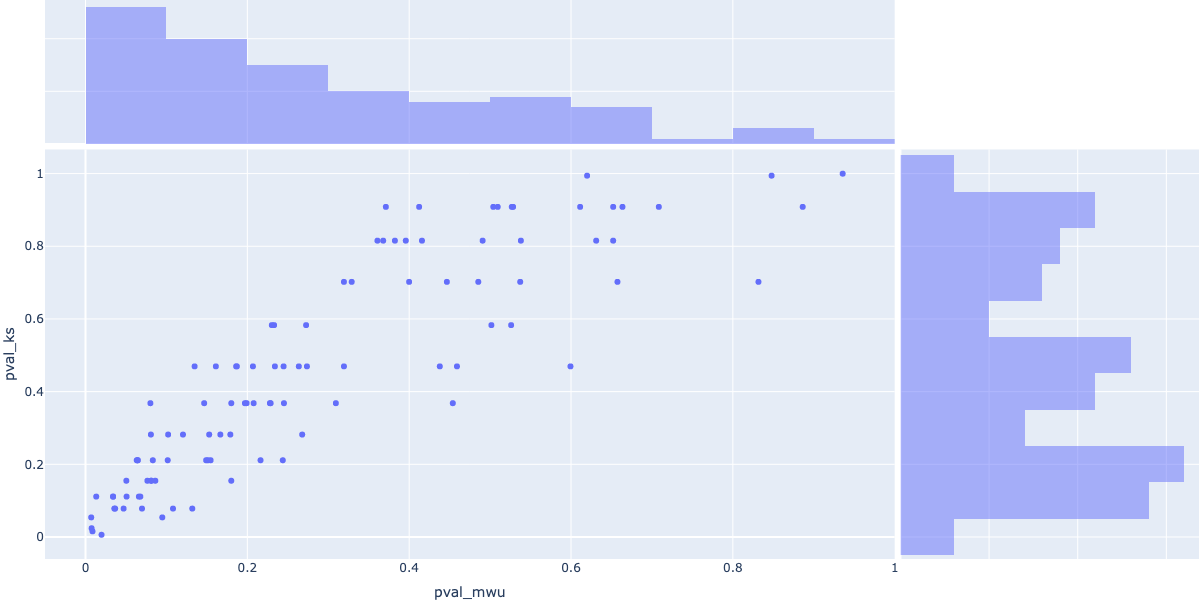

In [ ]:
from scipy import stats

rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
sample2 = stats.norm.rvs(size=110, random_state=rng)
stats.ks_2samp(sample1, sample2)